<a href="https://colab.research.google.com/github/datascienceayacuchoperu/ML_PROJECTS/blob/main/SVM_example_enei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MÁQUINA DE SOPORTE VECTORIAL - *SUPPORT VECTOR MACHINES*
## Source: [video de ENEI](https://www.facebook.com/EscuelaINEI/videos/134302242180681)
Queremos predecir si una empresa va a colocar  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
#importamos el dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

In [ ]:
X = dataset.iloc[:,[2,3]].values #me quedo con los valores de la 3 y cuarta columna, age y estimated salary
y = dataset.iloc[:,4].values #elijo a la quinta columna como la variable dependiente

In [ ]:
#Dividimos el conjunto del dataset en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#se parte la data para poder entrenar y validar

In [ ]:
#SVM es un modelo basado en distancias. Requiere que sus variables x e y, estén escalonadas y normalizadas
#ya que aquellas variables que sean más altas en número, se atribuyan la mayor parte de la predicción

#escalado o escalonamiento de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [ ]:
#Ajustamos el SVM en el conjunto de entrenamiento
# Generamos el objeto clasificador que permite generar dicho ajuste
from sklearn.svm import SVC
classifier = SVC (kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicción de los resultados con el conjunto de testing
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
#Elaboramos la matriz de confusión
#Una métrica cuando vemos modelos de clasificación es crear una matrix de confusión. Lo ideas es que la diagonal
#se aproxime lo mayor posible a la data real. Es decir, que lo predicho se aproxime a la data real
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]])

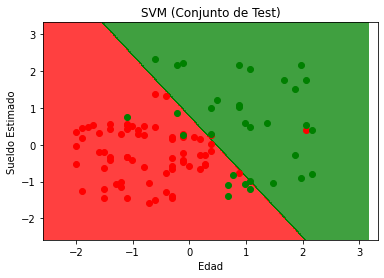

In [ ]:
#Representación gráfica de los resultados del algoritmo en el conjunto de Testing
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend
plt.show()

**Nota:** La región roja es la zona de rechazo de la compra y la verde es de aceptación de la compra. Si los puntos están sobre el mismo color de la zona, quiere decir que son los puntos que son correctamente clasificados y los verdes que invaden la zona roja, son los errores que se cometió en la clasificación. Lo mismo para la zona verde.